# Projeto de Engenharia de Dados

## Gráficos Relevantes:
1. Valor médio, valor máximo e desvio padrão da idade (bar chart)
2. Porcentagem de celulares rooteados (bar chart)
3. Logins por dia da semana (pie chart)
4. Porcentagem de dispositivos que habilitaram localização falsa (bar chart)
5. Emulador VS Sem Emulador (pie chart)
6. Contas por aparelho em moda, média, mediana e desvio padrão (bar chart)
7. Valor médio, mediana e moda de reinicializações (bar chart)
8. Valor médio, mediana e moda de reinicializações diário (bar chart)
9. Média, Mediana e Desvio Padrão de apps máximos instalados por dispositivo
10. Porcentagem de aplicativos instalados fora de loja oficial (pie chart)

## Insights para o Projeto:
1. Que relação a instalação em loja não official e a localização suspeita tem com eventos de Account Takeover?
2. Emuladores e Account Takeovers - Há relações?
3. Root VS Sem root - Quais estão mais relacionados a account takeover?
4. Quantidade de Wallpaper tem relação com account takeover?
5. Quantos aparelhos tem instalações feitas fora de loja oficial? Qual a média?
6. Download Externo (external_download) VS Evento de account takeover - Um heatmap
7. Suspicious Location VS Evento de account takeover - Um heatmap
8. Há relação entre a quantidade média de boots por dia e eventos de account takeover?
9. Existe algum dia da semana onde ocorrem mais account takeovers?
10. Heatmap de correlações

## Importando bibliotecas e scripts

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import processamento

## Lendo os Dados

In [23]:
logins = processamento.reading_loginsset('csv')
logins_copy = logins.copy()

   Unnamed: 0            id        account_id         device_id  \
0           0  7.997403e+11  YgXAhVgdDLsozwto  fGb574abkmDJTQ6M   
1           1  7.997403e+11  bO+gPxgfZG9sXtCb  Xll03k9l/OL2r6LM   
2           2  7.997403e+11  9mEBGcdz+RLzRNB4  qoKjqPhxqyALMsQ5   
3           3  7.997403e+11  tghz/Mlz069esl03  5fqsAP5QUp1M3PLC   
4           4  7.997403e+11  9mEBGcdz+RLzRNB4  qoKjqPhxqyALMsQ5   

    installation_id     timestamp  is_from_official_store  is_emulator  \
0  Uv9PEQZEwsW8nLOj  1.621290e+12                     1.0          0.0   
1  pR7skP90RuM3oqhK  1.620309e+12                     1.0          0.0   
2  hzKrODiR6F0jG4rH  1.625228e+12                     1.0          0.0   
3  krWwUuXbmBEP9g38  1.624645e+12                     1.0          0.0   
4  hzKrODiR6F0jG4rH  1.619907e+12                     1.0          0.0   

   has_fake_location_app  has_fake_location_enabled  probable_root  \
0                    0.0                        0.0            0.0   
1           

## Tratando os Dados (Preprocessamento)

In [30]:
# Excluindo linhas onde há nulos
logins_copy = processamento.dropping_nas(logins_copy)

# Transformando booleanos pela legibilidade
logins_copy = processamento.transform_bool(logins_copy)

# Gerando as novas colunas para a analise
logins_copy = processamento.create_new_columns(logins_copy)

## Gerando Gráficos

1. Média, Mediana e Desvio Padrão das Idades de Celular

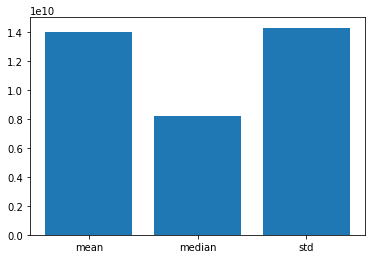

In [4]:
def device_age_data_graphic(logins):
    device_age_data = np.array([logins['device_age_ms'].mean(),
                                logins['device_age_ms'].median(),
                                logins['device_age_ms'].std()])

    plt.figure()
    plt.bar(['mean', 'median', 'std'], device_age_data)
device_age_data_graphic(logins_copy)

2. Porcentagem de celulares rooteados 

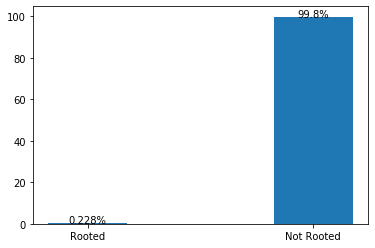

In [5]:
def percentage_root_graphic(logins):
  total = logins.shape[0]
  rooted = logins[logins['probable_root'] == 1].shape[0]
  not_rooted = total - rooted
  percentage_root = (rooted / total) *100
  percentage_not_root = (not_rooted / total)*100

  x = ['Rooted' , 'Not Rooted']
  y = [percentage_root , percentage_not_root]
  width = 0.35

  ax = plt.subplot()
  pps = ax.bar(x , y ,  width , align = 'center')
  for p in pps: 
      height = p.get_height()
      ax.text(x=p.get_x() + p.get_width() / 2, y=height,
        s="{:.3}%".format(height),
        ha='center')
  height = np.array([rooted , not_rooted])
  plt.show()
percentage_root_graphic(logins_copy)


3. Logins por dia da semana

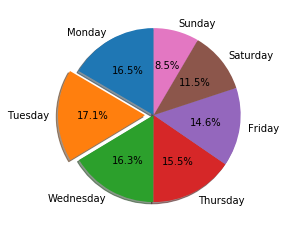

In [6]:
def logins_weekday_graphic(logins):
    date = (logins['timestamp']/86400000).values.astype(dtype='datetime64[D]')
    dayNumber = pd.Series(date , copy=False).dt.dayofweek
    x_label = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
    y_label = []
    for i in range(0 , 7):
        y_label.append(dayNumber[dayNumber == i].count() )
    pie_chart = plt.subplot()
    pie_chart.pie(y_label , labels = x_label , explode = (0, 0.1, 0, 0 , 0 , 0 , 0), autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.show()
logins_weekday_graphic(logins_copy)

4. Porcentagem de dispositivos com localização falsa habilitada

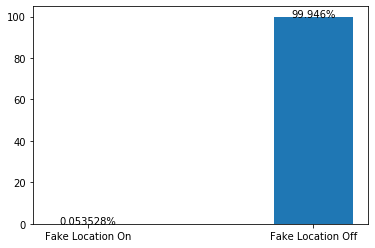

In [7]:
def percentage_fake_location__enable_graphic(logins):
  total = logins.shape[0]
  fake = logins[logins['has_fake_location_enabled'] == 1].shape[0]
  not_fake = total - fake
  percentage_fake = (fake / total) *100
  percentage_not_fake = (not_fake / total)*100

  x = ['Fake Location On' , 'Fake Location Off']
  y = [percentage_fake , percentage_not_fake]
  width = 0.35

  ax = plt.subplot()
  pps = ax.bar(x , y ,  width , align = 'center')
  for p in pps: 
      height = p.get_height()
      ax.text(x=p.get_x() + p.get_width() / 2, y=height,
        s="{:.5}%".format(height),
        ha='center')
  height = np.array([fake , not_fake])
  plt.show()
percentage_fake_location__enable_graphic(logins_copy)


5. Emulador vs Sem Emulador 

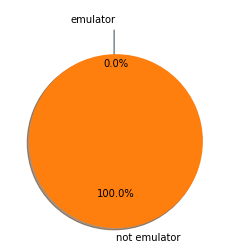

In [8]:
def emulator_graphic(logins):
    total = logins.shape[0]
    emulator = logins[logins['is_emulator'] == 1].shape[0]
    not_emulator = total - emulator
    labels = ['emulator' , 'not emulator']
    values = [emulator , not_emulator]
    pie_chart = plt.subplot()
    pie_chart.pie(values , labels = labels , explode = (0, 0.3), autopct='%1.1f%%',
            shadow=True, startangle=90)
    
emulator_graphic(logins_copy)
    


6. Contas por aparelho em moda, média, mediana e desvio padrão

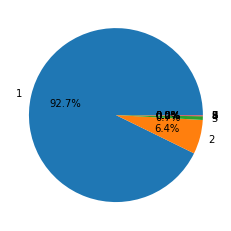

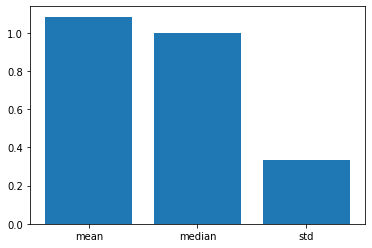

In [9]:
def device_accounts_graph(logins):
    acc_count = logins.groupby('n_accounts')['n_accounts'].count()
    arr = np.array(acc_count)
    x_label = np.array(range(len(arr))) + 1
    plt.figure()
    plt.pie(acc_count, labels=x_label, autopct='%1.1f%%')
    acc_count_important = np.array([logins['n_accounts'].mean(),
                                logins['n_accounts'].median(),
                                logins['n_accounts'].std()])
    plt.figure()
    plt.bar(['mean', 'median', 'std'], acc_count_important)

device_accounts_graph(logins_copy)


7. Valor Médio, Mediana e Moda de Reinicializações

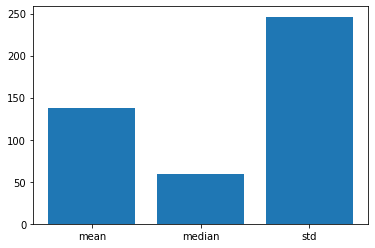

In [10]:
def plot_total_boot(logins):
    boot_count = np.array([logins['boot_count'].mean(),
                            logins['boot_count'].median(),
                            logins['boot_count'].std()])

    plt.figure()
    plt.bar(['mean', 'median', 'std'], boot_count)

plot_total_boot(logins_copy)

8. Valor Médio, Mediana e Desvio Padrão de Reinicializações Diárias

[7.51296345e+05 4.32904934e-01 4.12987788e+08]


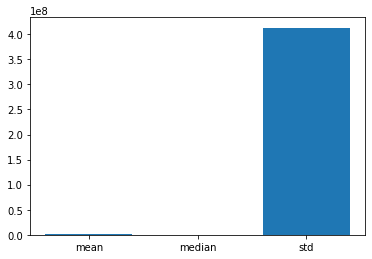

In [24]:
def plot_daily_boot(logins):
    is_inf = logins['boot_frequency_per_day'] == np.inf
    logins['boot_frequency_per_day'] = logins[~is_inf]['boot_frequency_per_day']
    boot_frequency_per_day = np.array([logins['boot_frequency_per_day'].mean(),
                            logins['boot_frequency_per_day'].median(),
                            logins['boot_frequency_per_day'].std()])
    print(boot_frequency_per_day)
    plt.figure()
    plt.bar(['mean', 'median', 'std'], boot_frequency_per_day)

plot_daily_boot(logins_copy)


9. Média, Mediana e Desvio Padrão de apps máximos instalados por dispositivo

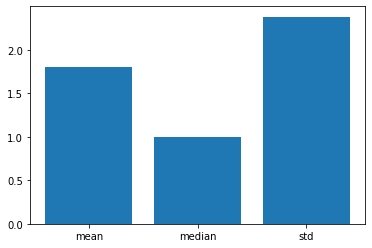

In [12]:
def installed_ammount_chart(logins):
    max_installations = np.array([logins['max_installations_on_related_devices'].mean(),
                                    logins['max_installations_on_related_devices'].median(),
                                    logins['max_installations_on_related_devices'].std()])

    plt.figure()
    plt.bar(['mean', 'median', 'std'], max_installations)

installed_ammount_chart(logins_copy)


10. Porcentagem de aplicativos instalados fora de loja oficial (pie chart)

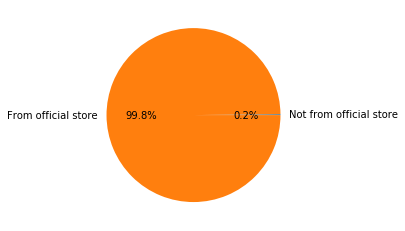

In [13]:
def outside_official_store(logins):
    store_data = logins.groupby('is_from_official_store')['is_from_official_store'].count()
    x_label=["Not from official store", "From official store"]
    plt.figure()
    plt.pie(store_data, labels=x_label, autopct='%1.1f%%')

outside_official_store(logins_copy)

## Insights

1. Instalação em Loja não Official e Localização Suspeita VS eventos de Account Takeover

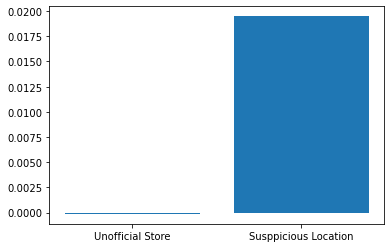

In [44]:
def unofficial_store_vs_ato(logins):
    correlations = np.array([logins['external_download'].corr(logins['ato']),
                            logins['suspicious_location'].corr(logins['ato'])])
    plt.figure()
    plt.bar(['Unofficial Store', 'Susppicious Location'], correlations)

unofficial_store_vs_ato(logins_copy)

2. Emulador e Localização Suspeita VS eventos de Account Takeover

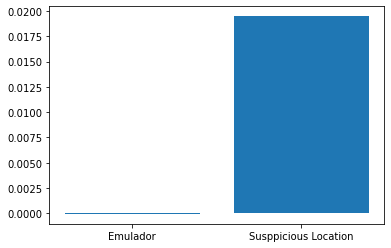

In [33]:
def emulator_vs_ato(logins):
    correlations = np.array([logins['is_emulator'].corr(logins['ato']),
                            logins['suspicious_location'].corr(logins['ato'])])
    plt.figure()
    plt.bar(['Emulador', 'Susppicious Location'], correlations)

emulator_vs_ato(logins_copy)

3. Root VS Sem root - Quais estão mais relacionados a account takeover?

		 -2.017415517433209e-05


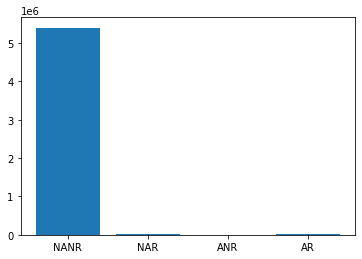

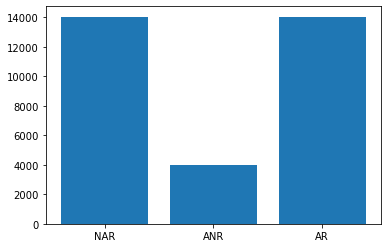

In [34]:
def root_ato(logins):
    not_ato_not_root = logins[(logins['ato'] == 0) & (logins['probable_root'] == 0)]
    not_ato_root = logins[(logins['ato'] == 0) & (logins['probable_root'] == 1)]

    ato_not_root = logins[(logins['ato'] == 1) & (logins['probable_root'] == 0)]
    ato_root = logins[(logins['ato'] == 0) & (logins['probable_root'] == 1)]
    
    correlations1 = np.array([
        len(not_ato_not_root), len(not_ato_root), len(ato_not_root), len(ato_root)])
    
    correlations2 = np.array([len(not_ato_root), len(ato_not_root), len(ato_root)])

    plt.figure()
    plt.bar(['NANR', 'NAR', 'ANR', 'AR'], correlations1)

    plt.figure()
    plt.bar(['NAR', 'ANR', 'AR'], correlations2)

    corr_dataframe = logins['probable_root'].corr(logins['ato'])
    print('\t\t',corr_dataframe)

root_ato(logins_copy)

4. Quantidade de Wallpaper tem relação com account takeover?

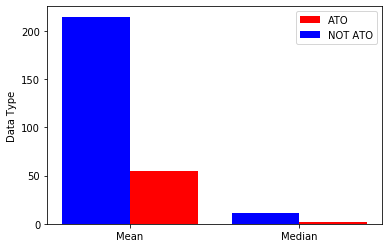

		 -0.0023021244646640898


In [14]:
def wallpapers_and_ato(logins):
    not_ato_data = logins[logins['ato'] == 0]['wallpaper_count']
    ato_data = logins[logins['ato'] == 1]['wallpaper_count']
    
    not_atos = [not_ato_data.mean(), not_ato_data.median()]
    atos = [ato_data.mean(), ato_data.median()]

    fig = plt.figure()
    ax = fig.add_subplot()
    x_axis = np.arange(2)
    na_bars = ax.bar(x_axis-0.2, not_atos, 0.4, color='b')
    a_bars = ax.bar(x_axis+0.2, atos, 0.4, color='r')

    ax.set_ylabel('Data Type')
    ax.legend((a_bars, na_bars), ('ATO', 'NOT ATO'))

    corr_dataframe = logins['wallpaper_count'].corr(logins['ato'])
    plt.xticks(x_axis, ['Mean', 'Median'])
    plt.show()
    print('\t\t',corr_dataframe)

wallpapers_and_ato(logins_copy)

5. Quantos aparelhos tem instalações feitas fora de loja oficial? Qual a média?

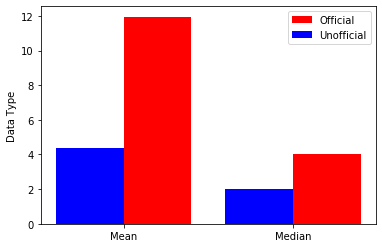

		 -0.0009861777287380334


In [15]:
def unofficial_installing(logins):
    unofficial = logins[logins['is_from_official_store'] == 0]
    groupped_unofficial = unofficial.groupby('device_id')['device_id'].count()
    official = logins[logins['is_from_official_store'] == 1]
    groupped_official = official.groupby('device_id')['device_id'].count()
    
    unofficial_points = [groupped_unofficial.mean(), groupped_unofficial.median()]
    official_points = [groupped_official.mean(), groupped_official.median()]

    fig = plt.figure()
    ax = fig.add_subplot()
    x_axis = np.arange(2)
    un_bars = ax.bar(x_axis-0.2, unofficial_points, 0.4, color='b')
    o_bars = ax.bar(x_axis+0.2, official_points, 0.4, color='r')

    ax.set_ylabel('Data Type')
    ax.legend((o_bars, un_bars), ('Official', 'Unofficial'))

    corr_dataframe = logins['is_from_official_store'].corr(logins['ato'])
    plt.xticks(x_axis, ['Mean', 'Median'])
    plt.show()
    print('\t\t',corr_dataframe)

unofficial_installing(logins_copy)

6. Download Externo, Emulador e Localização Suspeita VS Evento de Account Takeover

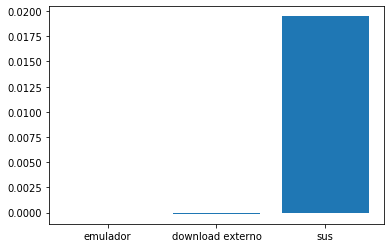

In [16]:
def external_vs_ato(logins):
    correlacoes = np.array([logins['is_emulator'].corr(logins['ato']),
                            logins['external_download'].corr(logins['ato']),
                            logins['suspicious_location'].corr(logins['ato'])])
    plt.figure()
    plt.bar(['emulador', 'download externo', 'sus'], correlacoes)

external_vs_ato(logins_copy)

8. Há relação entre a quantidade média de boots por dia e eventos de account takeover?

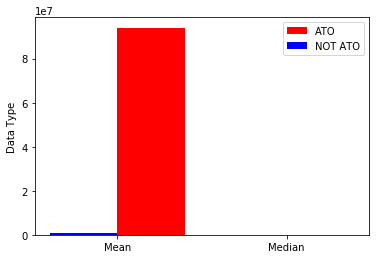

		  Correlação:  0.0029312682429254062


In [48]:
def boot_frequency_ato(logins):
    is_inf = logins['boot_frequency_per_day'] == np.inf
    logins = logins[~is_inf] ## eliminar frequencias infinitas 
    
    ato_data = logins[logins['ato'] == 1]['boot_frequency_per_day']
    not_ato_data = logins[logins['ato'] == 0]['boot_frequency_per_day']
    not_atos = [not_ato_data.mean(), not_ato_data.median()]
    atos = [ato_data.mean(), ato_data.median()]

    fig = plt.figure()
    ax = fig.add_subplot()
    x_axis = np.arange(2)
    na_bars = ax.bar(x_axis-0.2, not_atos, 0.4, color='b')
    a_bars = ax.bar(x_axis+0.2, atos, 0.4, color='r')

    ax.set_ylabel('Data Type')
    ax.legend((a_bars, na_bars), ('ATO', 'NOT ATO'))

    corr_dataframe = logins['boot_frequency_per_day'].corr(logins['ato'])
    plt.xticks(x_axis, ['Mean', 'Median'])
    plt.show()
    print('\t\t', " Correlação: " , corr_dataframe)
boot_frequency_ato(logins_copy)

9. Existe algum dia da semana onde ocorrem mais account takeovers?

[479 470 458 412 375 238 198]
['Wednesday' 'Tuesday' 'Monday' 'Friday' 'Thursday' 'Saturday' 'Sunday']


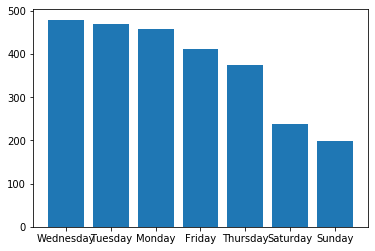

In [42]:
def weekday_more_ato(logins):
    has_Ato = logins['ato'] == 1
    df = logins[has_Ato]['weekday'].value_counts()
    x = df.index
    y = df.values
    print(np.array(df.values))
    print(np.array(df.index))
    plt.figure()
    plt.bar(x , y)
weekday_more_ato(logins_copy)

10. Heatmap de Correlações

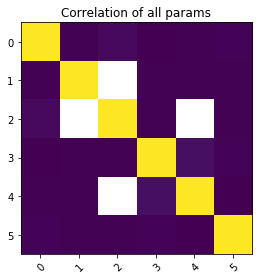

In [17]:
def corr_heatmap(logins):
    lc = logins.copy()
    date = (logins['timestamp']/86400000).values.astype(dtype='datetime64[D]')
    day_number = pd.Series(date , copy=False).dt.dayofweek
    lc['daynumber'] = day_number

    param_list = ['ato', 'daynumber', 'suspicious_location', 'boot_count',
                'wallpaper_per_accounts', 'probable_root']
    corr_list = []
    for param1 in param_list:
        cur_list = []
        for param2 in param_list:
            cur_list.append(lc[param1].corr(lc[param2]))
        corr_list.append(cur_list)
    
    corr_list = np.array(corr_list)

    fig, ax = plt.subplots()
    im = ax.imshow(corr_list)

    ax.set_xticks(np.arange(len(param_list)))
    ax.set_yticks(np.arange(len(param_list)))

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax.set_title("Correlation of all params")
    fig.tight_layout()
    plt.show()

corr_heatmap(logins_copy)